In [1]:
import helpers as hp
import numpy as np
from svm import distance_point_to_hyperplane, compute_margin, plot_data_and_boundary

In [2]:
def cprint(*args):
    print(*args, sep='\n', end='\n\n')

In [3]:
# Parameters
num = 3
training_data = hp.generate_training_data_binary(num)
cprint(training_data)

[[ 3.  2.  1.]
 [ 6.  2.  1.]
 [ 3.  6.  1.]
 [ 4.  4.  1.]
 [ 5.  4.  1.]
 [-1. -2. -1.]
 [-2. -4. -1.]
 [-3. -3. -1.]
 [-4. -2. -1.]
 [-4. -4. -1.]]



In [4]:
# Preprocessing
# Separate into classes
positive_set = []
negative_set = []
for pt in training_data:
    label = pt[-1]
    if label == 1:
        positive_set.append(pt)
    elif label == -1:
        negative_set.append(pt)

positive_set = np.array(positive_set)
negative_set = np.array(negative_set)
cprint(positive_set,negative_set)

[[3. 2. 1.]
 [6. 2. 1.]
 [3. 6. 1.]
 [4. 4. 1.]
 [5. 4. 1.]]
[[-1. -2. -1.]
 [-2. -4. -1.]
 [-3. -3. -1.]
 [-4. -2. -1.]
 [-4. -4. -1.]]



In [5]:
# Enumerate all possible support-vector combinations

# 2 support vectors

two_sv = []
for pos_pt in positive_set:
    for neg_pt in negative_set:
        two_sv.append((pos_pt, neg_pt))
two_sv = np.array(two_sv)

cprint(two_sv[:3])

[[[ 3.  2.  1.]
  [-1. -2. -1.]]

 [[ 3.  2.  1.]
  [-2. -4. -1.]]

 [[ 3.  2.  1.]
  [-3. -3. -1.]]]



In [6]:
# Compute w and b for each pair of support vectors
w_b = []
for pair in two_sv:
    positive_pt = pair[0][:-1]
    negative_pt = pair[1][:-1]
    dist = positive_pt - negative_pt
    dir_w = dist / np.linalg.norm(dist)
    gamma = np.linalg.norm(dist / 2)
    this_w = dir_w / gamma
    b = 1 - this_w @ positive_pt
    print(this_w,b)
    w_b.append((this_w,b))
    # cprint(dir_w, gamma, this_w, b)
# cprint(w_b)


[0.25 0.25] -0.24999999999999978
[0.16393443 0.19672131] 0.11475409836065564
[0.19672131 0.16393443] 0.08196721311475397
[0.21538462 0.12307692] 0.10769230769230753
[0.16470588 0.14117647] 0.22352941176470587
[0.21538462 0.12307692] -0.5384615384615388
[0.16 0.12] -0.19999999999999996
[0.16981132 0.09433962] -0.2075471698113207
[0.17241379 0.06896552] -0.17241379310344862
[0.14705882 0.08823529] -0.0588235294117645
[0.1 0.2] -0.5
[0.08 0.16] -0.19999999999999973
[0.1025641  0.15384615] -0.23076923076923062
[0.12389381 0.14159292] -0.22123893805309724
[0.09395973 0.13422819] -0.08724832214765099
[0.16393443 0.19672131] -0.4426229508196724
[0.12 0.16] -0.1200000000000001
[0.14285714 0.14285714] -0.14285714285714302
[0.16 0.12] -0.1200000000000001
[0.125 0.125] 1.1102230246251565e-16
[0.16666667 0.16666667] -0.5000000000000002
[0.12389381 0.14159292] -0.18584070796460184
[0.14159292 0.12389381] -0.20353982300884943
[0.15384615 0.1025641 ] -0.1794871794871793
[0.12413793 0.11034483] -0.062

In [ ]:
# Find w, b with largest margin
largest_margin = 0
for w,b in w_b:
    this_margin = compute_margin(training_data, w, b)
    if this_margin > largest_margin:
        largest_margin = this_margin
        final_w, final_b = w, b
    print(this_margin)


5.656854249492379
3.456995758188192
3.456995758188192
2.8527988955517958
2.0608393492772334
2.8527988955517927
5.2
5.050686484257774
5.19946946895745
4.4589632137052275
1.7888543819998317
4.024922359499624
4.16025147168922
4.609532255079627
5.488853867477571
3.456995758188189
5.599999999999998
5.65685424949238
5.200000000000001
4.242640687119284
2.828427124746188
4.985820602433065
4.985820602433067
5.269651864139679
4.899683311370657


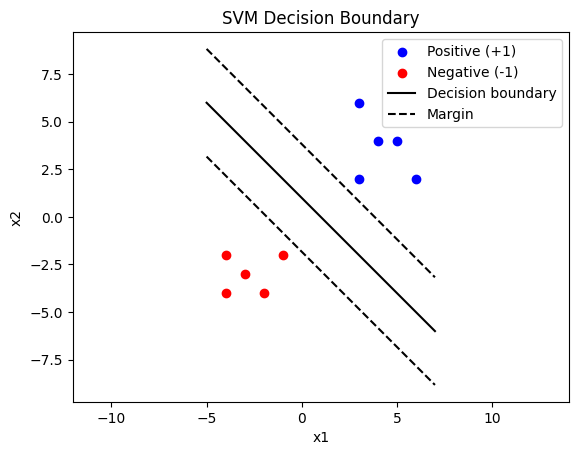

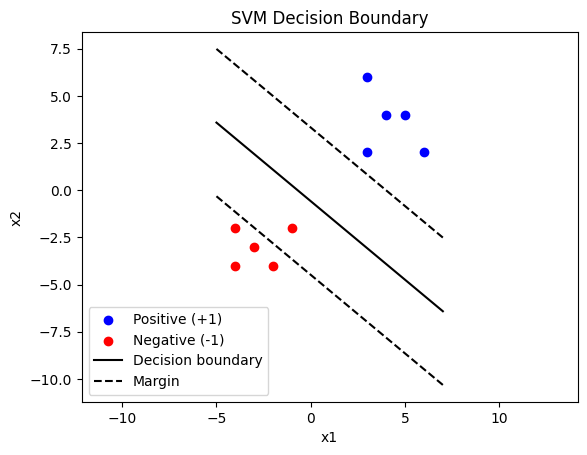

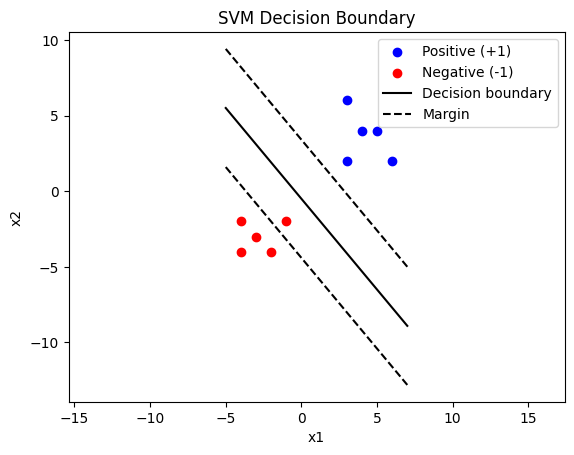

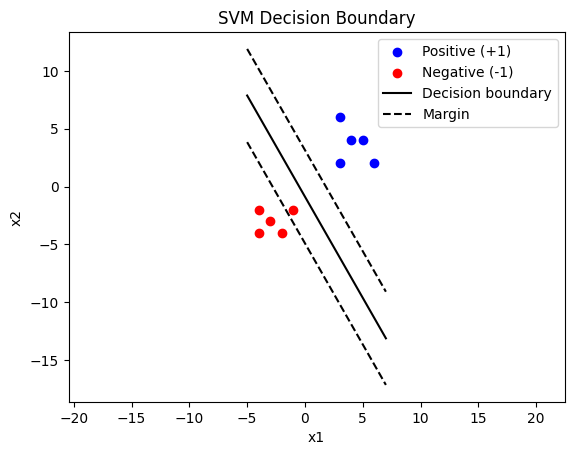

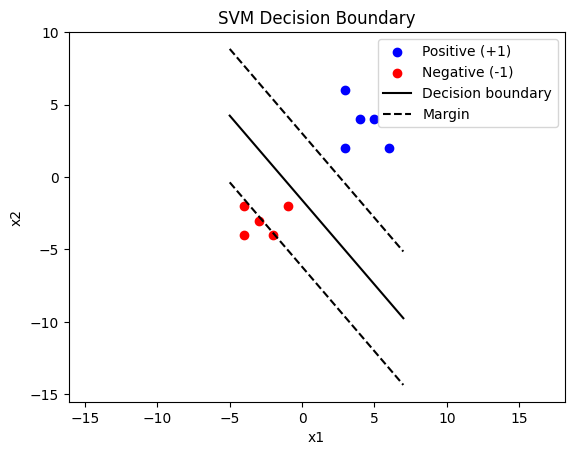

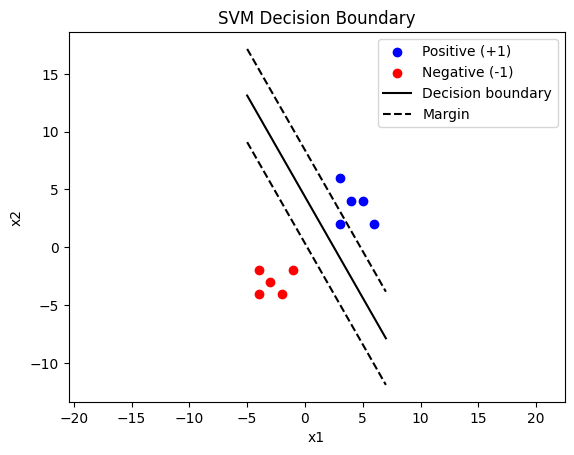

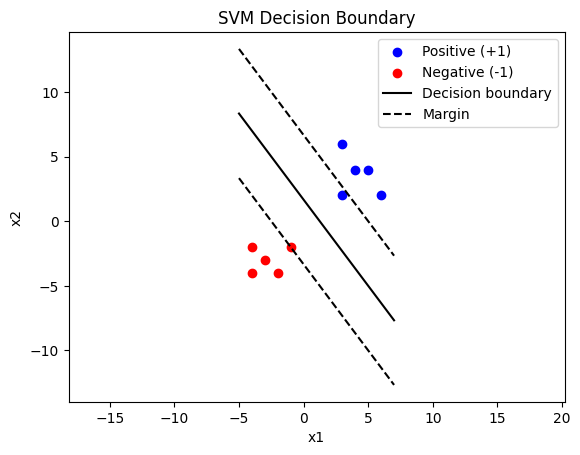

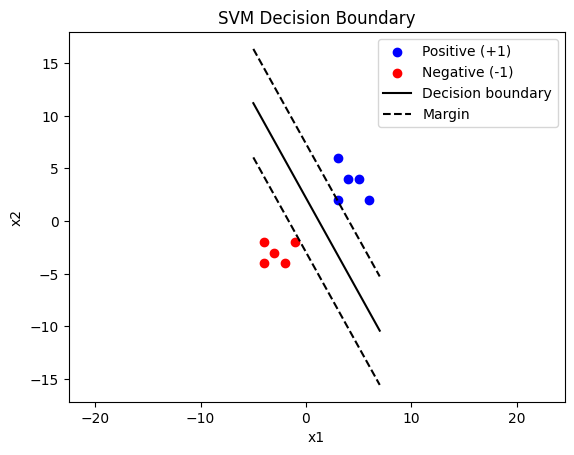

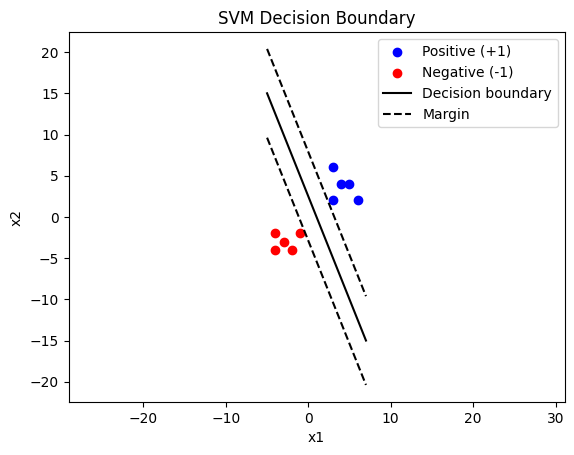

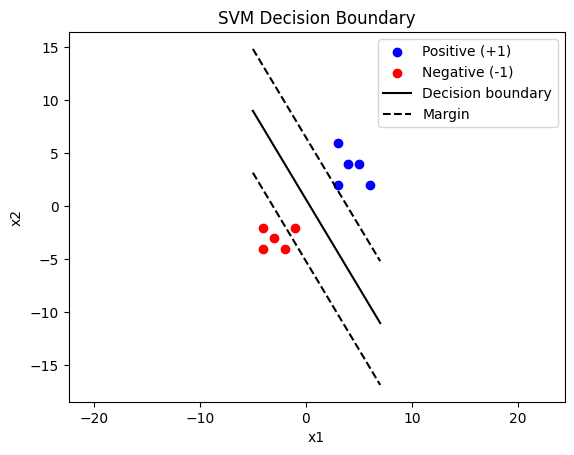

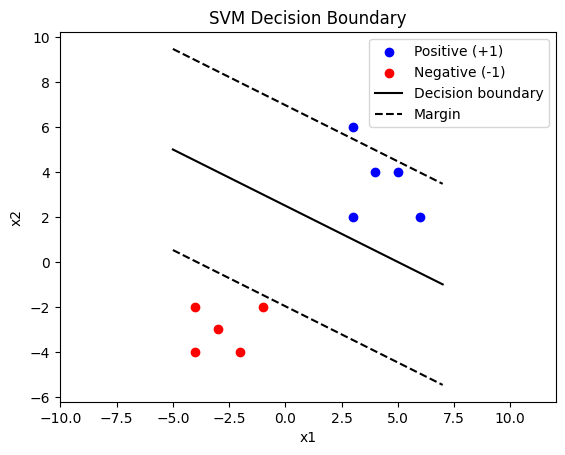

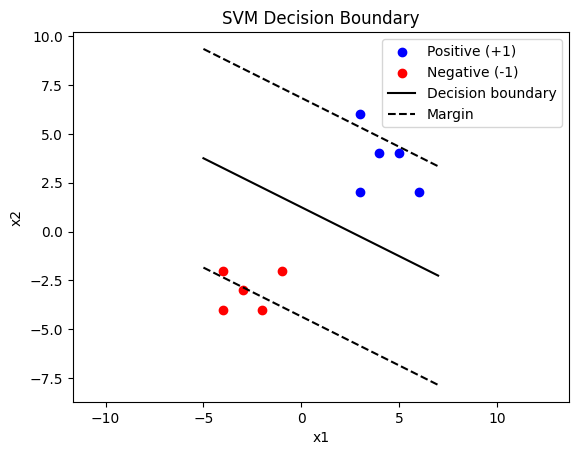

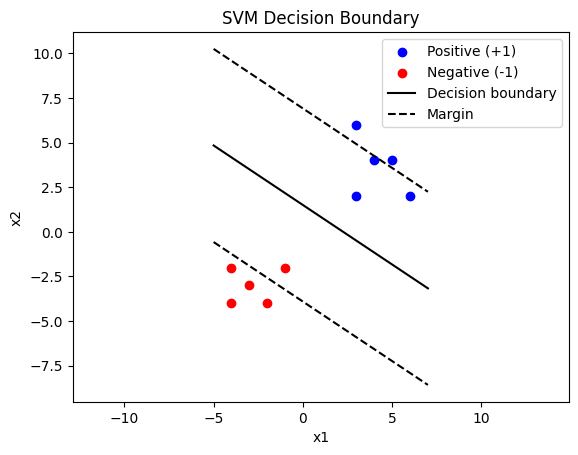

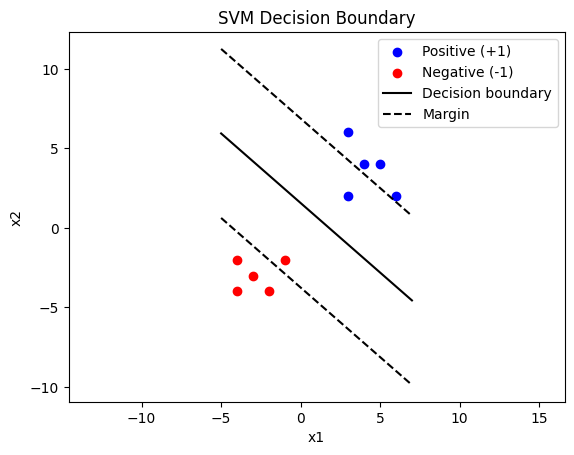

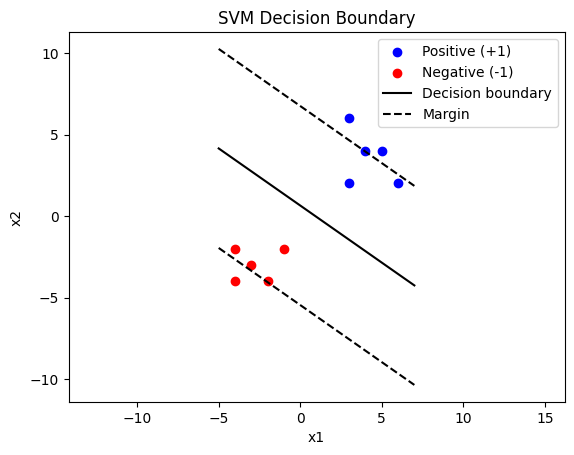

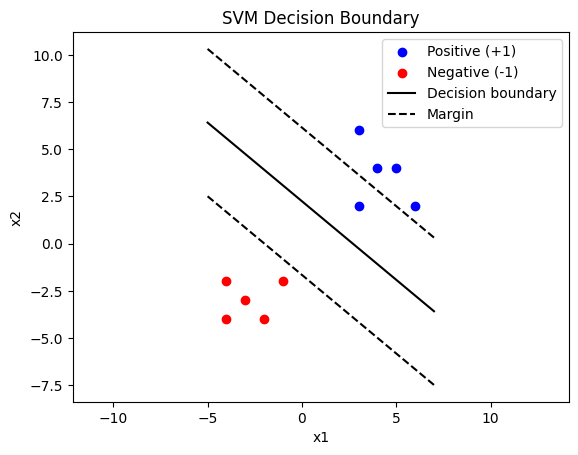

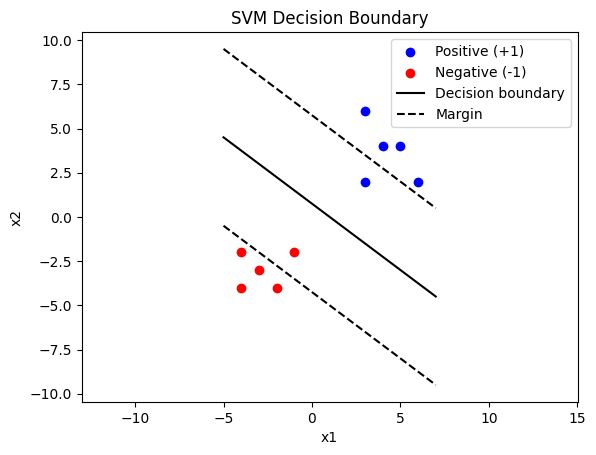

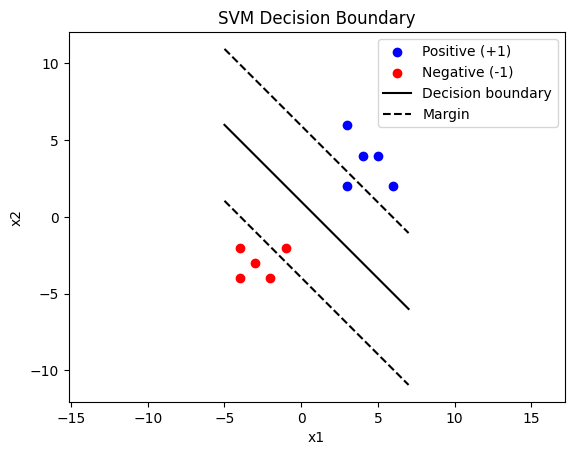

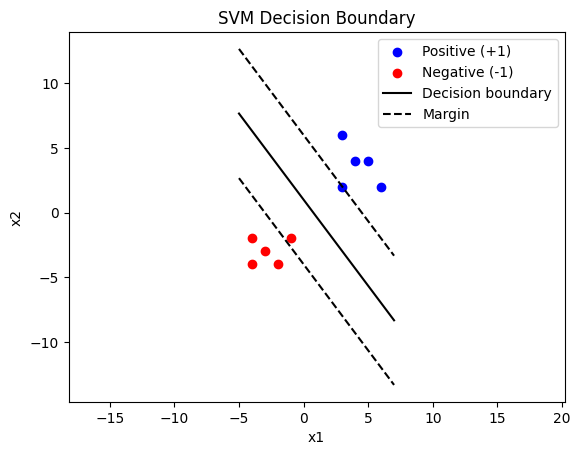

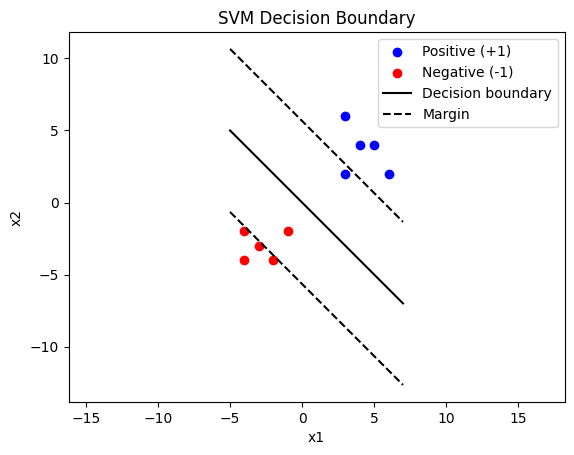

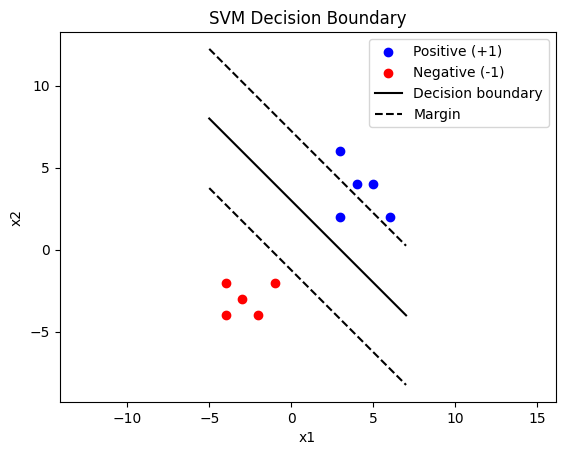

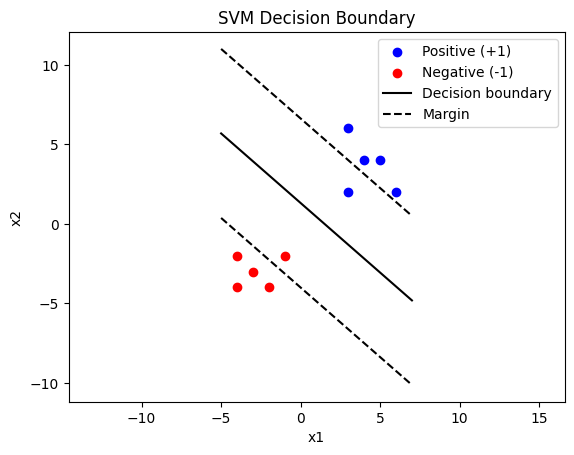

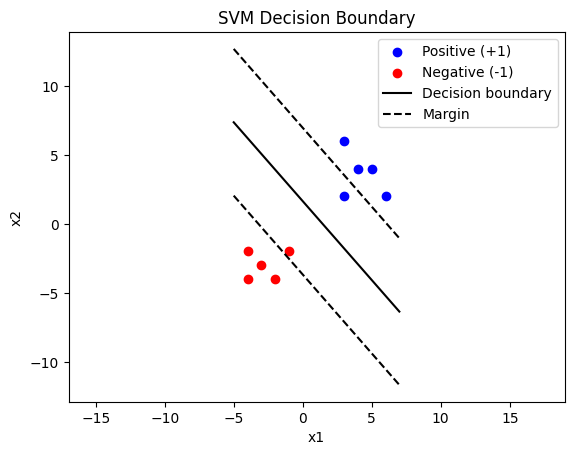

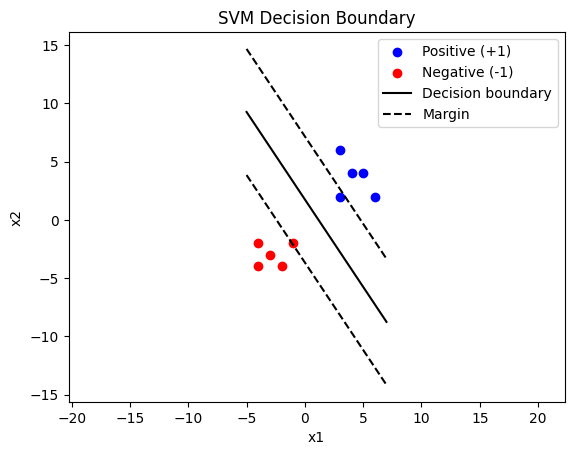

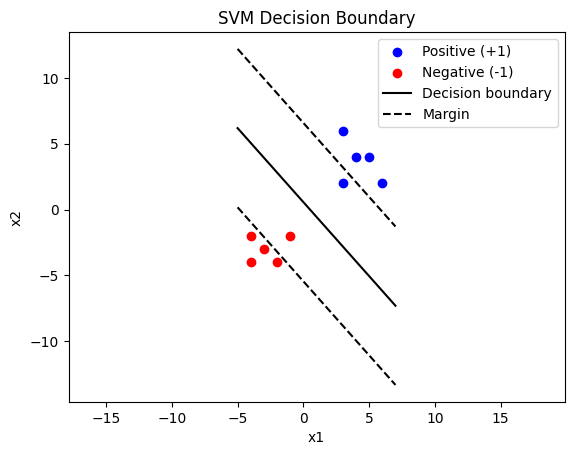

In [8]:
for w,b in w_b:
    plot_data_and_boundary(training_data, w, b)

In [9]:
# 3 support vectors

three_sv = []
for i in range(len(positive_set)):
    for j in range(i + 1, len(positive_set)):
        for neg_pt in negative_set:
            three_sv.append((positive_set[i], positive_set[j], neg_pt))

for i in range(len(negative_set)):
    for j in range(i + 1, len(negative_set)):
        for pos_pt in positive_set:
            three_sv.append((negative_set[i], negative_set[j], pos_pt))

three_sv = np.array(three_sv)

cprint(three_sv[:3])

[[[ 3.  2.  1.]
  [ 6.  2.  1.]
  [-1. -2. -1.]]

 [[ 3.  2.  1.]
  [ 6.  2.  1.]
  [-2. -4. -1.]]

 [[ 3.  2.  1.]
  [ 6.  2.  1.]
  [-3. -3. -1.]]]



In [10]:
# Compute w for each triplet of support vectors

all_w_b = []
for triplet in three_sv:
    A = np.array([
        [triplet[0][0], triplet[0][1], 1],
        [triplet[1][0], triplet[1][1], 1],
        [triplet[2][0], triplet[2][1], 1]
    ])
    y = np.array(triplet[:, -1])
    # print(A,y,sep='\n\n')
    # print()
    w_b = np.linalg.solve(A, y)
    cprint(w_b)
    # all_w_b.append(w_b)

# all_w_b = np.array(all_w_b)
# print(all_w_b[:3])

    

[ 0.00000000e+00  5.00000000e-01 -3.08395285e-18]

[0.         0.33333333 0.33333333]

[0.  0.4 0.2]

[0.  0.5 0. ]

[-3.70074342e-17  3.33333333e-01  3.33333333e-01]

[ 0.5  0.  -0.5]

[ 0.4  0.  -0.2]

[0.33333333 0.         0.        ]

[2.85714286e-01 3.08395285e-18 1.42857143e-01]

[ 2.85714286e-01 -1.15648232e-17  1.42857143e-01]

[ 1.  -0.5 -1. ]

[ 1.  -0.5 -1. ]

[ 0.57142857 -0.28571429 -0.14285714]

[ 0.4 -0.2  0.2]

[ 0.5  -0.25  0.  ]

[ 1.50119988e+15 -1.50119988e+15 -1.50119988e+15]

[-2.  2.  3.]

[ 2. -2. -1.]

[ 0.66666667 -0.66666667  0.33333333]

[ 2. -2. -1.]

[ 0.2   0.15 -0.5 ]

[ 0.16  0.12 -0.2 ]

[ 0.15686275  0.11764706 -0.17647059]

[ 0.15384615  0.11538462 -0.15384615]

[ 0.13793103  0.10344828 -0.03448276]

[ 0.18181818  0.18181818 -0.45454545]

[ 0.14285714  0.14285714 -0.14285714]

[ 0.14285714  0.14285714 -0.14285714]

[ 0.14285714  0.14285714 -0.14285714]

[0.125 0.125 0.   ]

[ 0.22222222  0.11111111 -0.55555556]

[ 0.18181818  0.09090909 -0.27272727]

LinAlgError: Singular matrix